In [38]:
%matplotlib inline

In [108]:
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

In [80]:

def getData(data):
    """
    This function will take the data extracted from the JSON and put it into a pandas dataframe
    
    Since all the data is coming from a JSON I have decided to grab lat and long every time, this will
    help in the future if new mesonets are added to the system.
    
    There may be a much easier way to extract data from a dictionary then what I did but it works
    """
    
    #creating empty dataframe
    AllData = pd.DataFrame([], columns=('Station','Latitude','Longitude','Height','Temperature'))
    
    #loop for going through json. Station represents the only variable, mesonet name
    for station in data['currentMesonetConditions']:
        lat    = data['currentMesonetConditions'][station]['latitude']
        lon    = data['currentMesonetConditions'][station]['longitude']
        height = data['currentMesonetConditions'][station]['sitelevation']
        temp   = data['currentMesonetConditions'][station]['temperature']
        AllData = AllData.append({'Station':station,
                                  'Latitude':float(lat),
                                  'Longitude':float(lon),
                                  'Height':int(height),
                                  'Temperature':float(temp)},
                                 ignore_index=True) #I am forcing the dataframe without an index
        
    return AllData

In [206]:
with urllib.request.urlopen("http://xmountwashington.appspot.com/mesonet-feed.php?callback=1") as url:
    data = json.loads(url.read().decode())
    
MesoDataFrame = getData(data)
MesoDataFrame = MesoDataFrame.sort_values(by=['Height'])
#Having trouble getting SKLearn to work with full dataframe so just extracted what I need
tempData = MesoDataFrame[['Height','Temperature']]

In [207]:
#Putting data into xy cordinates
X = tempData.iloc[:,0:1].values
Y =  tempData.iloc[:,1].values

In [208]:
#Creating a polynomial to plot the data and create a learning function, 3rd degree has matched best so far with test
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, Y)
line = LinearRegression()
line.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

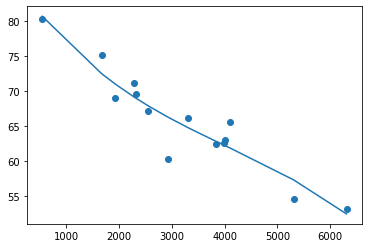

In [209]:
plt.scatter(X,Y)
plt.plot(X,line.predict(poly.fit_transform(X)))

In [210]:
line.predict(poly.fit_transform([[10]])),line.predict(poly.fit_transform([[1000]])),line.predict(poly.fit_transform([[7000]]))

(array([85.80110621]), array([76.97161006]), array([48.00459416]))

In [211]:
MesoDataFrame

,Station,Latitude,Longitude,Height,Temperature
0,NCON,44.056221,-71.129730,539,80.3
11,CRAN,44.057569,-71.092848,1670,75.2
2,HICR,44.220293,-71.411553,1929,69.0
13,ATTI,44.070604,-71.219595,2274,71.1
5,AR23,44.281127,-71.246320,2310,69.6
1,BRWD,44.254531,-71.465018,2548,67.1
7,CANN,44.157722,-71.699151,2925,60.3
10,AR33,44.286711,-71.265723,3310,66.2
3,MIZP,44.219442,-71.369436,3843,62.4
9,WILD,44.249077,-71.224602,3990,62.5
